In [ ]:
# %load_ext cudf.pandas

### Loading and Transforming Data

Run once, transforms dataset for graph learning

In [1]:
output_path = "data/sensor_df.pkl"

In [2]:
# # Run once, do not delete!
# from utilities import SensorCyclePipeline

# input_path = "data/sensor.csv"

# pipeline = SensorCyclePipeline(input_path, output_path)
# pipeline.run()

In [3]:
import pandas as pd
df_sensor_raw = pd.read_pickle(output_path)
# Temporary
# df_sensor_temp = df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
#                            'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
#                             #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
#                                ]].copy()
df_sensor_temp = df_sensor_raw.copy()

df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
               'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
                     #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
              ]].copy()

,timestamp,CycleID,machine_status,sensor_00_value_decimals,sensor_00_value,sensor_00_value_exp_weighted_mean_span10000,sensor_00_value_exp_weighted_std_span10000,sensor_00_value_zscore_span10000
0,2018-04-01 00:00:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
1,2018-04-01 00:01:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
2,2018-04-01 00:02:00,0,NORMAL,6.0,2.444734,NaN,NaN,NaN
3,2018-04-01 00:03:00,0,NORMAL,6.0,2.460474,NaN,NaN,NaN
4,2018-04-01 00:04:00,0,NORMAL,6.0,2.445718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,21,NORMAL,5.0,2.407350,2.437010,0.047856,-0.619769
220316,2018-08-31 23:56:00,21,NORMAL,6.0,2.400463,2.437002,0.047854,-0.763558
220317,2018-08-31 23:57:00,21,NORMAL,6.0,2.396528,2.436994,0.047853,-0.845642
220318,2018-08-31 23:58:00,21,NORMAL,6.0,2.406366,2.436988,0.047850,-0.639963


In [4]:
cycle_stats = df_sensor_raw.groupby('CycleID').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    duration_min=('timestamp', lambda x: (x.max() - x.min()).total_seconds() / 60),
    count=('timestamp', 'count'),
    status=('machine_status', 'first')
).reset_index()

# Save separately
cycle_stats.to_pickle("cycle_stats.pkl")

In [5]:
cycle_stats

,CycleID,start_time,end_time,duration_min,count,status
0,0,2018-04-01 00:00:00,2018-04-12 21:54:00,17154.0,17155,NORMAL
1,1,2018-04-12 21:55:00,2018-04-12 21:55:00,0.0,1,BROKEN
2,2,2018-04-12 21:56:00,2018-04-13 13:39:00,943.0,944,RECOVERING
3,3,2018-04-13 13:40:00,2018-04-18 00:29:00,6409.0,6410,NORMAL
4,4,2018-04-18 00:30:00,2018-04-18 00:30:00,0.0,1,BROKEN
5,5,2018-04-18 00:31:00,2018-04-20 04:20:00,3109.0,3110,RECOVERING
6,6,2018-04-20 04:21:00,2018-05-19 03:17:00,41696.0,41697,NORMAL
7,7,2018-05-19 03:18:00,2018-05-19 03:18:00,0.0,1,BROKEN
8,8,2018-05-19 03:19:00,2018-05-20 01:10:00,1311.0,1312,RECOVERING
9,9,2018-05-20 01:11:00,2018-05-25 00:29:00,7158.0,7159,NORMAL


In [6]:
mask_cycleids = cycle_stats[cycle_stats['status'] == 'BROKEN']['CycleID'].tolist()
print(f'"BROKEN" CycleIDs:{mask_cycleids})')
df_sensor_temp = df_sensor_temp[~df_sensor_temp['CycleID'].isin(mask_cycleids)]

# Merge end_time into df_sensor_temp and create df_sensor_temp2
df_sensor_temp2 = pd.merge(df_sensor_temp,
                           cycle_stats[['CycleID', 'end_time']],
                           on='CycleID',
                           how='left')

# Convert to datetime
df_sensor_temp2['timestamp'] = pd.to_datetime(df_sensor_temp2['timestamp'])
df_sensor_temp2['end_time'] = pd.to_datetime(df_sensor_temp2['end_time'])

# Add 1 minute to end_time
df_sensor_temp2['end_time_plus_1min'] = df_sensor_temp2['end_time'] + pd.Timedelta(minutes=1)

# Calculate time difference in minutes until state change
df_sensor_temp2['time_to_state_change_min'] = (
    df_sensor_temp2['end_time_plus_1min'] - df_sensor_temp2['timestamp']
).dt.total_seconds() / 60

# Drop the helper column if you want
df_sensor_temp2 = df_sensor_temp2.drop(columns=['end_time', 'end_time_plus_1min'])

df_sensor = df_sensor_temp2.copy()

"BROKEN" CycleIDs:[1, 4, 7, 10, 13, 16, 19])


In [7]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,sensor_43_value_zscore_span10000,sensor_44_value_zscore_span10000,sensor_45_value_zscore_span10000,sensor_46_value_zscore_span10000,sensor_47_value_zscore_span10000,sensor_48_value_zscore_span10000,sensor_49_value_zscore_span10000,sensor_50_value_zscore_span10000,sensor_51_value_zscore_span10000,time_to_state_change_min
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17155.0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17154.0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17153.0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17152.0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,-0.959677,0.705336,-0.182574,-0.641104,-0.371023,-1.150948,1.663453,NaN,0.422608,5.0
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,-0.959493,0.622401,-0.267563,-0.660588,-0.404368,-1.126177,1.734143,NaN,0.422558,4.0
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,-0.812938,0.539477,-0.352550,-0.660493,-0.404321,-1.067111,1.709681,NaN,0.457591,3.0
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,-0.520024,0.473131,-0.409191,-0.640822,-0.437667,-0.978661,1.669408,NaN,0.539395,2.0


In [8]:
print(list(df_sensor.columns))

['timestamp', 'sensor_00_value', 'sensor_01_value', 'sensor_02_value', 'sensor_03_value', 'sensor_04_value', 'sensor_05_value', 'sensor_06_value', 'sensor_07_value', 'sensor_08_value', 'sensor_09_value', 'sensor_10_value', 'sensor_11_value', 'sensor_12_value', 'sensor_13_value', 'sensor_14_value', 'sensor_16_value', 'sensor_17_value', 'sensor_18_value', 'sensor_19_value', 'sensor_20_value', 'sensor_21_value', 'sensor_22_value', 'sensor_23_value', 'sensor_24_value', 'sensor_25_value', 'sensor_26_value', 'sensor_27_value', 'sensor_28_value', 'sensor_29_value', 'sensor_30_value', 'sensor_31_value', 'sensor_32_value', 'sensor_33_value', 'sensor_34_value', 'sensor_35_value', 'sensor_36_value', 'sensor_37_value', 'sensor_38_value', 'sensor_39_value', 'sensor_40_value', 'sensor_41_value', 'sensor_42_value', 'sensor_43_value', 'sensor_44_value', 'sensor_45_value', 'sensor_46_value', 'sensor_47_value', 'sensor_48_value', 'sensor_49_value', 'sensor_50_value', 'sensor_51_value', 'machine_status',

### Graph Construction

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# THRESHOLD_CORR = 0.6

# # filter rows from specific cycles
# filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# # select only sensor columns ending with '_value'
# sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
# sensor_data = filtered[sensor_cols]

# # compute Spearman correlation matrix
# corr_matrix, _ = spearmanr(sensor_data, axis=0)

# # build graph from correlation matrix
# G = nx.Graph()
# for i, col_i in enumerate(sensor_cols):
#     node_i = col_i.replace("_value", "")
#     G.add_node(node_i)
#     for j in range(i + 1, len(sensor_cols)):
#         corr = corr_matrix[i, j]
#         if abs(corr) > THRESHOLD_CORR:
#             node_j = sensor_cols[j].replace("_value", "")
#             G.add_edge(node_i, node_j, weight=corr)

# # visualize graph
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# weights = [abs(G[u][v]['weight']) * 4 for u, v in G.edges()]

# nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
# nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=600)
# nx.draw_networkx_labels(G, pos, font_size=9)

# plt.title(f"Graph Construction: Sensor Spearman Correlation (|r| > {THRESHOLD_CORR})")
# plt.axis('off')
# plt.tight_layout()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Use modularity-based clustering
# from networkx.algorithms.community import greedy_modularity_communities

# clusters = list(greedy_modularity_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (greedy_modularity_communities)")
# plt.axis('off')
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community import label_propagation_communities

# # Use label propagation clustering
# clusters = list(label_propagation_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (label_propagation_communities)")
# plt.axis('off')
# plt.show()


[['sensor_00'],
 ['sensor_01'],
 ['sensor_44', 'sensor_02', 'sensor_03'],
 ['sensor_38',
  'sensor_41',
  'sensor_47',
  'sensor_40',
  'sensor_43',
  'sensor_39',
  'sensor_37',
  'sensor_42'],
 ['sensor_04'],
 ['sensor_05'],
 ['sensor_06'],
 ['sensor_07'],
 ['sensor_08'],
 ['sensor_09'],
 ['sensor_10'],
 ['sensor_11'],
 ['sensor_12'],
 ['sensor_13'],
 ['sensor_19',
  'sensor_18',
  'sensor_21',
  'sensor_17',
  'sensor_14',
  'sensor_16',
  'sensor_20',
  'sensor_24',
  'sensor_26',
  'sensor_25'],
 ['sensor_22'],
 ['sensor_23'],
 ['sensor_27', 'sensor_28'],
 ['sensor_33', 'sensor_31', 'sensor_36', 'sensor_32'],
 ['sensor_29'],
 ['sensor_30'],
 ['sensor_35', 'sensor_34'],
 ['sensor_46', 'sensor_45'],
 ['sensor_48', 'sensor_51', 'sensor_49', 'sensor_50']]

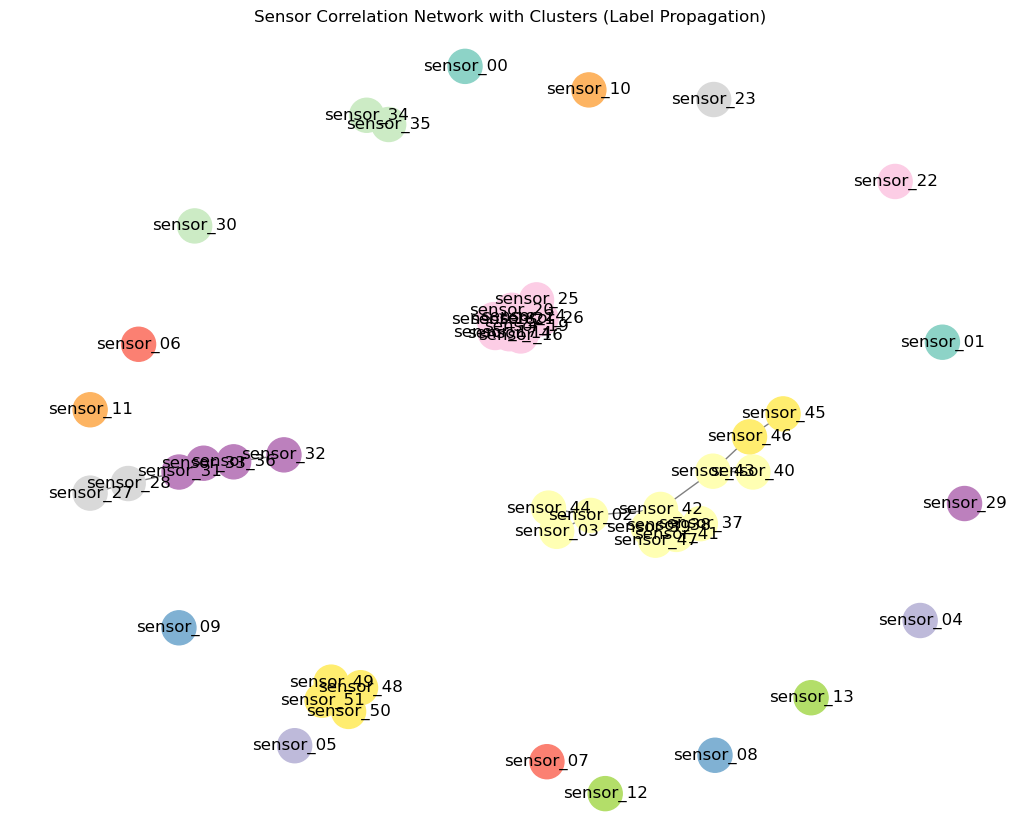

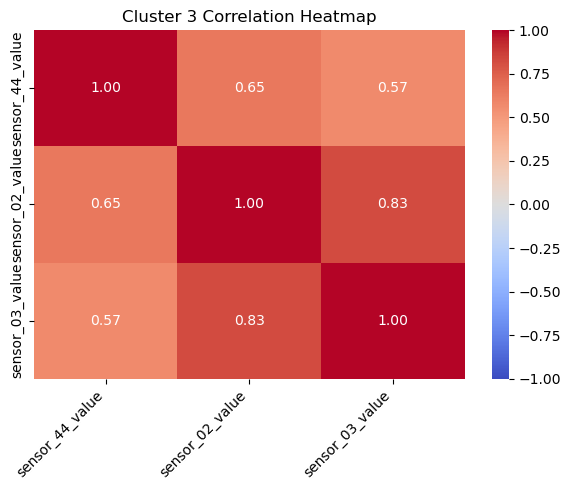

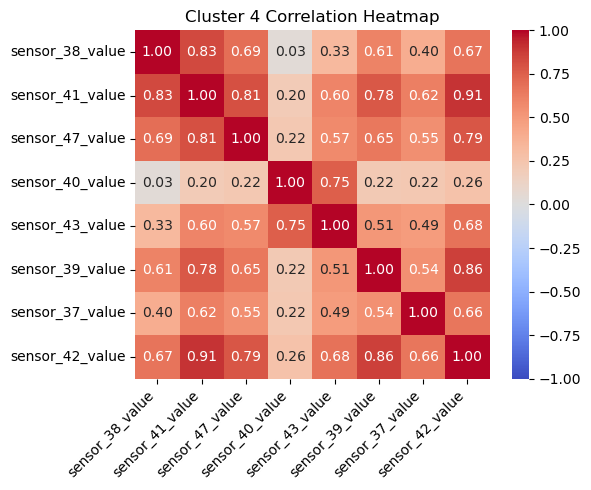

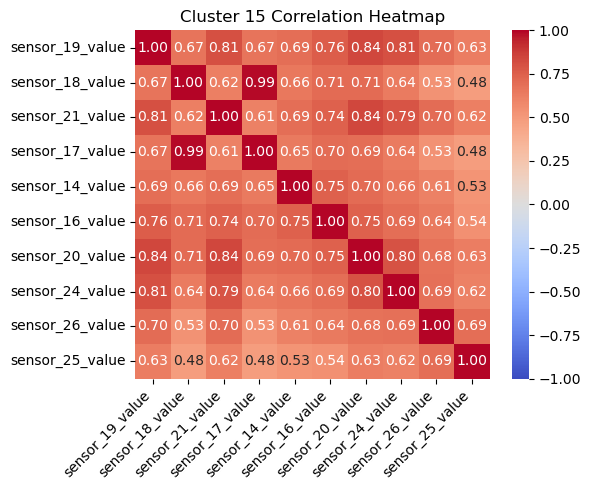

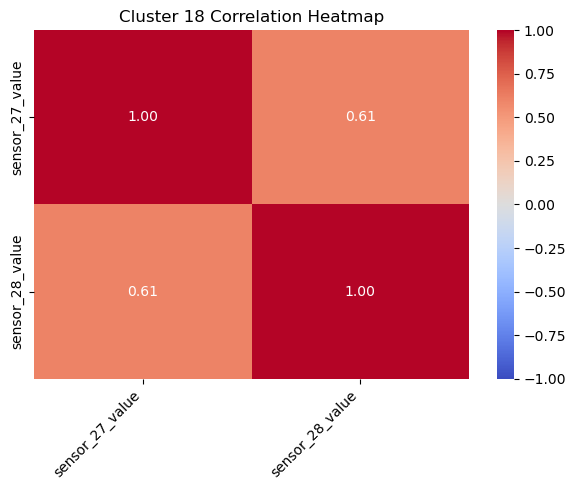

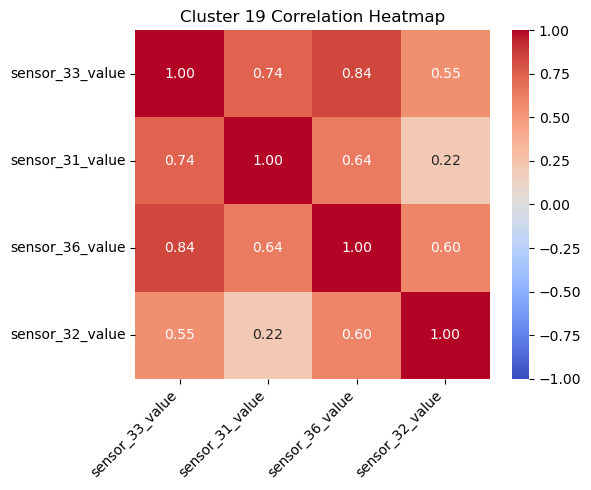

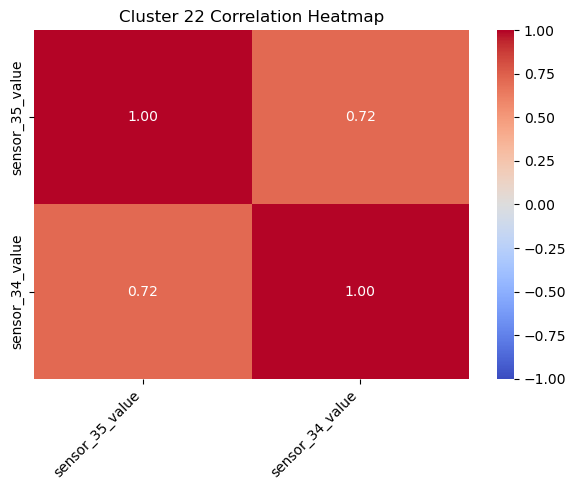

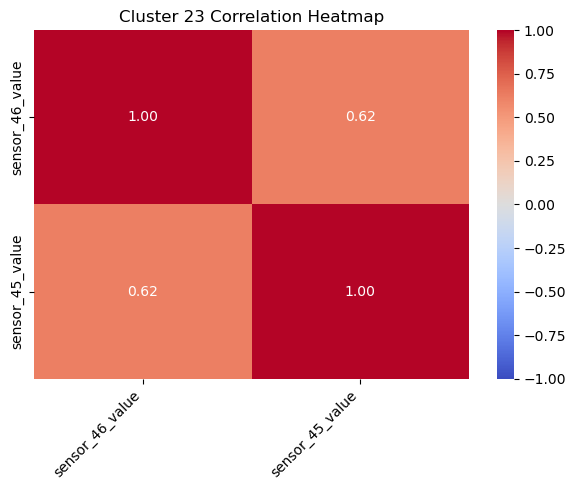

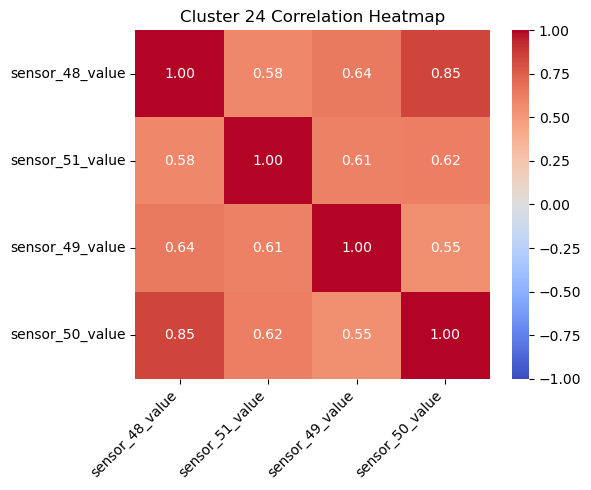

In [9]:
# clusters
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np
from networkx.algorithms.community import label_propagation_communities

THRESHOLD_CORR = 0.6

# filter rows from specific cycles
filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# select only sensor columns ending with '_value'
sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
sensor_data = filtered[sensor_cols]

# compute Spearman correlation matrix
corr_matrix, _ = spearmanr(sensor_data, axis=0)

# build graph from correlation matrix
G = nx.Graph()
for i, col_i in enumerate(sensor_cols):
    node_i = col_i.replace("_value", "")
    G.add_node(node_i)
    for j in range(i + 1, len(sensor_cols)):
        corr = corr_matrix[i, j]
        if abs(corr) > THRESHOLD_CORR:
            node_j = sensor_cols[j].replace("_value", "")
            G.add_edge(node_i, node_j, weight=corr)

# ---- label propagation clustering ----
clusters = list(label_propagation_communities(G))
sensor_clusters = [list(cluster) for cluster in clusters]

display(sensor_clusters)

# Assign colors to clusters
color_map = {}
for i, cluster in enumerate(clusters):
    for node in cluster:
        color_map[node] = i
node_colors = [color_map[node] for node in G.nodes()]

# Visualize graph with colored clusters
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.Set3,
    node_size=600,
    edge_color='gray'
)
plt.title("Sensor Correlation Network with Clusters (Label Propagation)")
plt.axis('off')
plt.show()

# ---- Correlation heatmaps per cluster ----

# Build name→index map
name_to_idx = {col: i for i, col in enumerate(sensor_cols)}

for i, cluster in enumerate(sensor_clusters):
    if len(cluster) <= 1:
        continue  # skip singleton clusters

    # get full column names
    names = [f"{node}_value" for node in cluster]

    # get their indices in corr matrix
    idxs = [name_to_idx[name] for name in names]

    # extract correlation submatrix
    submat = corr_matrix[np.ix_(idxs, idxs)]

    # convert to numpy array
    data = np.array(submat, dtype=float)

    # plot heatmap
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(
        data,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        vmin=-1, vmax=1,
        xticklabels=names,
        yticklabels=names
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"Cluster {i+1} Correlation Heatmap")
    plt.tight_layout()
    plt.show()


### What's next

With sensors now clustered and edges weighted by correlation strength (above a defined threshold), the resulting graph provides a cleaner, less noisy view of signal relationships across the system.

Using this graph, label propagation can group signals into supernodes, where each supernode aggregates information from its member sensors. These supernodes retain weighted connections to related nodes and can be summarized at the system level into a single node representing the entire water pump system.

This structure supports a graph-informed classification model designed to assess the overall stability of the system:

- Binary Classifier: Predicts whether a machine is likely to change state within the next week (Stable vs. Unstable).

By focusing only on classification, the model avoids unnecessary regression complexity and overfitting on stable data, while still enabling prescriptive insights into which signals or subsystems are exhibiting abnormal behavior. This creates a foundation for monitoring, alerting, and prioritizing maintenance decisions based on the system's evolving stability.

In [10]:
# feature suffixes to include
feature_suffixes = [
    '_value',
    '_value_zscore_span10000',
    '_value_exp_weighted_mean_span10000',
    '_value_exp_weighted_std_span10000',
    '_value_decimals',
]

# lists to track clusters
used_clusters = []
skipped_clusters = []

# iterate through clusters
for i, cluster in enumerate(sensor_clusters):
    if len(cluster) < 2:
        skipped_clusters.append(i)
        continue

    # check if any feature columns exist for the cluster
    has_features = any(
        any(f"{sensor}{suffix}" in df_sensor.columns for sensor in cluster)
        for suffix in feature_suffixes
    )

    if not has_features:
        skipped_clusters.append(i)
        continue

    # add aggregated features
    for suffix in feature_suffixes:
        feat_cols = [f"{sensor}{suffix}" for sensor in cluster if f"{sensor}{suffix}" in df_sensor.columns]

        if feat_cols:
            df_sensor[f"supernode_{i}{suffix}_mean"] = df_sensor[feat_cols].mean(axis=1)
            df_sensor[f"supernode_{i}{suffix}_std"] = df_sensor[feat_cols].std(axis=1, ddof=0)

    used_clusters.append(i)

# print summary
print("Used clusters:", used_clusters)
print("Skipped clusters:", skipped_clusters)


Used clusters: [2, 3, 14, 17, 18, 21, 22, 23]
Skipped clusters: [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20]


In [11]:
# Separate NORMAL and RECOVERING cycles
normal_cycles = cycle_stats[cycle_stats['status'] == 'NORMAL'].sort_values('CycleID')
recovering_cycles = cycle_stats[cycle_stats['status'] == 'RECOVERING'].sort_values('CycleID')

# Helper to split counts proportionally by cumulative sum
def split_by_count(cycles_df, train_frac=0.5, test_frac=0.3):
    train, test, holdout = [], [], []
    cum_count = 0
    total = cycles_df['count'].sum()
    for cid, cnt in zip(cycles_df['CycleID'], cycles_df['count']):
        if cum_count < train_frac * total:
            train.append(cid)
        elif cum_count < (train_frac + test_frac) * total:
            test.append(cid)
        else:
            holdout.append(cid)
        cum_count += cnt
    return train, test, holdout

# Split each status
train_normal, test_normal, holdout_normal = split_by_count(normal_cycles)
train_recovering, test_recovering, holdout_recovering = split_by_count(recovering_cycles)

# Combine splits, keeping order within each status
train_cycles = train_normal + train_recovering
test_cycles = test_normal + test_recovering
holdout_cycles = holdout_normal + holdout_recovering

print("Train Cycles:", train_cycles)
print("Test Cycles:", test_cycles)
print("Holdout Cycles:", holdout_cycles)


Train Cycles: [0, 3, 6, 9, 12, 2, 5, 8, 11, 14]
Test Cycles: [15, 18, 21]
Holdout Cycles: [17, 20]


In [12]:
cycle_stats

,CycleID,start_time,end_time,duration_min,count,status
0,0,2018-04-01 00:00:00,2018-04-12 21:54:00,17154.0,17155,NORMAL
1,1,2018-04-12 21:55:00,2018-04-12 21:55:00,0.0,1,BROKEN
2,2,2018-04-12 21:56:00,2018-04-13 13:39:00,943.0,944,RECOVERING
3,3,2018-04-13 13:40:00,2018-04-18 00:29:00,6409.0,6410,NORMAL
4,4,2018-04-18 00:30:00,2018-04-18 00:30:00,0.0,1,BROKEN
5,5,2018-04-18 00:31:00,2018-04-20 04:20:00,3109.0,3110,RECOVERING
6,6,2018-04-20 04:21:00,2018-05-19 03:17:00,41696.0,41697,NORMAL
7,7,2018-05-19 03:18:00,2018-05-19 03:18:00,0.0,1,BROKEN
8,8,2018-05-19 03:19:00,2018-05-20 01:10:00,1311.0,1312,RECOVERING
9,9,2018-05-20 01:11:00,2018-05-25 00:29:00,7158.0,7159,NORMAL


In [67]:
# imports
import numpy as np
import torch
from torch_geometric.data import Data

def create_sensor_graph_template(sensor_clusters, all_sensors, corr_matrix=None, corr_threshold=0.6):
    """
    Build a PyG graph template using correlation-based edges if provided.
    System node kept for structure only; features will include global machine status elsewhere.
    
    Returns: node_names, node_types, edge list, cluster_map
    """

    X = []            # placeholder features
    E = []            # edge list
    node_names = []   # node labels
    node_types = []   # 0=system,1=supernode,2=sensor
    cluster_map = {}  # sensor→supernode
    table = {}
    idx = 0

    # system node (structural only)
    table['system'] = idx
    node_names.append('system')
    node_types.append(0)
    X.append([np.nan])  # placeholder
    idx += 1

    # supernodes
    for ci, cluster in enumerate(sensor_clusters):
        if len(cluster) < 2:
            continue
        sn_name = f"supernode_{ci}"
        table[sn_name] = idx
        node_names.append(sn_name)
        node_types.append(1)
        X.append([np.nan])
        E.extend([(0, idx), (idx, 0)])  # system ↔ supernode
        parent_idx = idx
        idx += 1

        for sensor in cluster:
            table[sensor] = idx
            node_names.append(sensor)
            node_types.append(2)
            X.append([np.nan])
            E.extend([(parent_idx, idx), (idx, parent_idx)])  # supernode ↔ sensor
            cluster_map[sensor] = sn_name
            idx += 1

    # singletons
    for sensor in all_sensors:
        if sensor in cluster_map:
            continue
        table[sensor] = idx
        node_names.append(sensor)
        node_types.append(2)
        X.append([np.nan])
        E.extend([(0, idx), (idx, 0)])  # system ↔ singleton
        idx += 1

    # correlation-based edges
    if corr_matrix is not None:
        sensor_idx = {s: table[s] for s in all_sensors}
        n_sensors = len(all_sensors)
        for i in range(n_sensors):
            for j in range(i+1, n_sensors):
                corr_val = corr_matrix[i, j]
                if not np.isnan(corr_val) and abs(corr_val) >= corr_threshold:
                    E.append((sensor_idx[all_sensors[i]], sensor_idx[all_sensors[j]]))
                    E.append((sensor_idx[all_sensors[j]], sensor_idx[all_sensors[i]]))  # undirected

    return node_names, node_types, E, cluster_map


def fill_sensor_graph_features_vectorized(
    features_row, # flattened 1D array of all sensor features
    node_names,
    node_types,
    cluster_map,
    all_sensors,
    machine_status=None,
    feature_suffixes=[
    '_value',
    '_value_decimals',
    '_value_exp_weighted_mean_span10000',
    '_value_exp_weighted_std_span10000',
    '_value_zscore_span10000',
],
    status_map={"BROKEN": 0, "NORMAL": 1, "RECOVERING": 2}
):
    """
    Fill features for existing graph template using a flattened feature row.
    Vectorized: uses precomputed row of all sensor features.
    """
    num_features = len(feature_suffixes)
    X = []

    sensor_idx_map = {sensor: i*num_features for i, sensor in enumerate(all_sensors)}
    status_val = float(status_map.get(machine_status, np.nan))  # global status

    for node, ntype in zip(node_names, node_types):
        if ntype == 1:  # supernode
            children = [s for s, sn in cluster_map.items() if sn == node]
            feats = []
            for i in range(num_features):
                vals = [
                    features_row[sensor_idx_map[s]+i]
                    for s in children
                    if not np.isnan(features_row[sensor_idx_map[s]+i])
                ]
                feats.append(np.nan if not vals else np.mean(vals))
        elif ntype == 2:  # sensor node
            start_idx = sensor_idx_map[node]
            feats = features_row[start_idx:start_idx+num_features].tolist()
        else:  # system node
            feats = [np.nan]*num_features

        feats = feats + [status_val]  # append global machine status
        X.append(feats)

    # convert to tensors
    x = torch.tensor(X, dtype=torch.float)
    edge_index = torch.tensor(E, dtype=torch.long).t().contiguous()
    node_type_tensor = torch.tensor(node_types, dtype=torch.long)

    data = Data(x=x, edge_index=edge_index)
    data.node_type = node_type_tensor
    data.node_name = node_names

    return data

In [69]:
# from torch_geometric.loader import DataLoader

# # this is OK
# graph_list = []
# cycle_ids = df_sensor['CycleID'].tolist()

# for idx, cycle in enumerate(cycle_ids):
#     data = build_sensor_graph_pyg(df_sensor, sensor_clusters, row_idx=idx)

#     # get row directly
#     row = df_sensor.iloc[idx]

#     # add graph-level label
#     data.y = torch.tensor([row['time_to_state_change_min']], dtype=torch.float)

#     # add metadata
#     data.cycle_id = cycle
#     graph_list.append(data)

# # this is OK
# train_graphs = [g for g in graph_list if g.cycle_id in train_cycles]
# test_graphs  = [g for g in graph_list if g.cycle_id in test_cycles]
# holdout_graphs = [g for g in graph_list if g.cycle_id in holdout_cycles]

# print(f"Train graphs: {len(train_graphs)}, Test: {len(test_graphs)}, Holdout: {len(holdout_graphs)}")


### Graph Loading/Completion (Pivoted Away from)

Constructing the graphs is extensive and time consuming for data prep!!

Testing how PyTorch handles NaN

In [70]:
from torch_geometric.loader import DataLoader

# ---------------------
# 1. Build template
# ---------------------
sensor_cols = [c for c in df_sensor.columns if c.startswith('sensor_') and c.endswith('_value')]
all_sensors = [c[:-6] for c in sensor_cols]

node_names, node_types, E, cluster_map = create_sensor_graph_template(sensor_clusters, all_sensors)

# ---------------------
# 2. Prepare feature arrays
# ---------------------
# Create a NumPy array of all features once
df_features = df_sensor[[f"{sensor}{suf}" for sensor in all_sensors for suf in feature_suffixes]].to_numpy()

graph_list = []
total_cycles = len(df_sensor['CycleID'].unique())

for i, cycle in enumerate(df_sensor['CycleID'].unique(), 1):
    cycle_rows = df_sensor[df_sensor['CycleID'] == cycle]
    indices = [0, len(cycle_rows)//2, len(cycle_rows)-1]

    # grab all feature rows for the indices
    for idx in indices:
        row = cycle_rows.iloc[idx]
        
        # grab flattened feature row
        features_row = df_features[row.name, :]
        
        # fill features (now with machine_status)
        data = fill_sensor_graph_features_vectorized(
            features_row,
            node_names=node_names,
            node_types=node_types,
            cluster_map=cluster_map,
            all_sensors=all_sensors,
            machine_status=row['machine_status']   # <-- added here
        )
        
        # add target and cycle ID
        data.y = torch.tensor([row['time_to_state_change_min']], dtype=torch.float)
        data.cycle_id = cycle
        graph_list.append(data)

    print(f"Processed cycle: {i}/{total_cycles} (CycleID: {cycle})")  # progress

# ---------------------
# 3. Split by cycles
# ---------------------
train_graphs = [g for g in graph_list if g.cycle_id in train_cycles]
test_graphs  = [g for g in graph_list if g.cycle_id in test_cycles]
holdout_graphs = [g for g in graph_list if g.cycle_id in holdout_cycles]

print(f"Train graphs: {len(train_graphs)}, Test: {len(test_graphs)}, Holdout: {len(holdout_graphs)}")


Processed cycle: 1/15 (CycleID: 0)
Processed cycle: 2/15 (CycleID: 2)
Processed cycle: 3/15 (CycleID: 3)
Processed cycle: 4/15 (CycleID: 5)
Processed cycle: 5/15 (CycleID: 6)
Processed cycle: 6/15 (CycleID: 8)
Processed cycle: 7/15 (CycleID: 9)
Processed cycle: 8/15 (CycleID: 11)
Processed cycle: 9/15 (CycleID: 12)
Processed cycle: 10/15 (CycleID: 14)
Processed cycle: 11/15 (CycleID: 15)
Processed cycle: 12/15 (CycleID: 17)
Processed cycle: 13/15 (CycleID: 18)
Processed cycle: 14/15 (CycleID: 20)
Processed cycle: 15/15 (CycleID: 21)
Train graphs: 30, Test: 9, Holdout: 6


In [ ]:
# import torch
# from multiprocessing import Pool, cpu_count
# from tqdm import tqdm

# # Detect CPU cores
# num_cores = cpu_count()//2
# print(f"Detected CPU cores: {num_cores}")

# # Decide number of processes to use (maybe leave one core free)
# num_processes = max(1, num_cores - 1)
# print(f"Using {num_processes} processes for multiprocessing")

# def process_cycle(cycle):
#     cycle_rows = df_sensor[df_sensor['CycleID'] == cycle]
#     local_graphs = []

#     for idx, row in cycle_rows.iterrows():
#         features_row = df_features[row.name, :]
#         data = fill_sensor_graph_features_vectorized(
#             features_row,
#             node_names=node_names,
#             node_types=node_types,
#             cluster_map=cluster_map,
#             all_sensors=all_sensors,
#             machine_status=row['machine_status']
#         )
#         data.y = torch.tensor([row['time_to_state_change_min']], dtype=torch.float)
#         data.cycle_id = cycle
#         local_graphs.append(data)

#     filename = f"graph_data/cycle_{cycle}.pt"
#     torch.save(local_graphs, filename)
#     return filename  # small object returned


# # Process in parallel
# with Pool(num_processes) as pool:
#     filenames = list(tqdm(pool.imap(process_cycle, df_sensor['CycleID'].unique()),
#                           total=len(df_sensor['CycleID'].unique())))

# Detected CPU cores: 12
# Using 11 processes for multiprocessing
# 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:50<00:00,  3.38s/it]
#   0%|                                                                                                                                                                                                                                               | 0/15 [00:00<?, ?it/s]

# Detected CPU cores: 12
# Using 11 processes for multiprocessing
# 100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:31<00:00,  2.11s/it]

In [ ]:
# graph_list = []
# for f in tqdm(filenames):
#     graph_list.extend(torch.load(f, weights_only=False))


# # Split by cycles
# train_graphs = [g for g in graph_list if g.cycle_id in train_cycles]
# test_graphs  = [g for g in graph_list if g.cycle_id in test_cycles]
# holdout_graphs = [g for g in graph_list if g.cycle_id in holdout_cycles]

# print(f"Train graphs: {len(train_graphs)}, Test: {len(test_graphs)}, Holdout: {len(holdout_graphs)}")

# # 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:57<00:00,  7.83s/it]
# # Train graphs: 78392, Test: 62775, Holdout: 79146
# # 100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [01:34<00:00,  6.31s/it]
# # Train graphs: 78392, Test: 62775, Holdout: 79146

# import torch
# import os

# # Make directory to store files
# os.makedirs("graph_data", exist_ok=True)

# # Save each split separately with numeric prefix
# torch.save(train_graphs, "graph_data/0_train.pt")
# torch.save(test_graphs,  "graph_data/1_test.pt")
# torch.save(holdout_graphs, "graph_data/2_holdout.pt")

In [ ]:
# import torch
# import os

# # Later, reload them
# train_graphs = torch.load("graph_data/0_train.pt", weights_only=False)
# test_graphs  = torch.load("graph_data/1_test.pt", weights_only=False)
# holdout_graphs = torch.load("graph_data/2_holdout.pt", weights_only=False)

### Using Graph Learning --- Tree-G  (Pivoted Away from)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from treeg.graph_treeg.data_formetter_graph_level import DataFormatter
from treeg.graph_treeg.graph_data_graph_level import GraphData
from ensembels.gbdt.treeg_gbdt import GradientBoostedGraphTreeGClassifier
from experiments import datasets

# Load dataset
dataset = datasets.TU_MUTAG()
formatter = DataFormatter(GraphData)
X, y = formatter.pyg_data_list_to_tree_graph_data_list(dataset)
X, y = np.array(X), np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Instantiate classifier with chosen hyperparameters
clf = GradientBoostedGraphTreeGClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_walk_len=10,
    attention_set_limit=0, #1,
    min_samples_leaf=2,
    max_leaf_nodes=None
)

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute MCC
mcc_score = matthews_corrcoef(y_test, y_pred)
print("MCC score:", mcc_score)

## MCC score: 0.8594950604174936
## MCC score: 0.8245302905175187
#MCC score: 0.8594950604174936


In [ ]:
print(f"Train graphs: {len(X_train)}, Test graphs: {len(X_test)}")

#### Notes

Ok so the treeg setup is working ok

In [ ]:
import numpy as np
import torch
from sklearn.metrics import matthews_corrcoef, mean_squared_error
from treeg.graph_treeg.data_formetter_graph_level import DataFormatter
from treeg.graph_treeg.graph_data_graph_level import GraphData
from ensembels.gbdt.treeg_gbdt import GradientBoostedGraphTreeGClassifier, GradientBoostedGraphTreeGRegressor
import random

# Convert to TREE-G GraphData
formatter = DataFormatter(GraphData)
X_train_raw, y_train_full_raw = formatter.pyg_data_list_to_tree_graph_data_list(train_graphs)
X_test_raw,  y_test_full_raw  = formatter.pyg_data_list_to_tree_graph_data_list(test_graphs)

In [ ]:
# --- Subsample every ssth for speed ---
subsampling = 250
X_train, y_train_full = X_train_raw[::subsampling], y_train_full_raw[::subsampling]
X_test, y_test_full   = X_test_raw[::subsampling],  y_test_full_raw[::subsampling]

print(f"Train graphs: {len(X_train)}, Test graphs: {len(X_test)}")

# # --- Add random noise feature ---
# rng = np.random.default_rng(seed=1)  # deterministic seed
# for g in X_train:
#     g.features = np.hstack([g.features, rng.random((g.features.shape[0], 1))])

# for g in X_test:
#     g.features = np.hstack([g.features, rng.random((g.features.shape[0], 1))])

# --- Select feature columns by index ---
feature_indices = [0, 1, 2, 3, 4, 5]  # choose which columns to keep (6th column is a random one)  # removed random as nothing else appeared

for g in X_train:
    g.features = g.features[:, feature_indices]

for g in X_test:
    g.features = g.features[:, feature_indices]

# Train graphs: 78392, Test graphs: 62775

In [ ]:
#### Good to split into code blocks ###############
# Define 1-week cutoff in minutes
cutoff = 10080  # 7 * 24 * 60

# --- Classification (all data) ---
y_train_cls = (np.array(y_train_full) <= cutoff).astype(int)
y_test_cls  = (np.array(y_test_full)  <= cutoff).astype(int)

seed = 40
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)

    # "max_walk_len": [20],
    # "attention_set_limit": [0],
    # "n_estimators": [100],
    # "learning_rate": [0.1],
    # "min_samples_leaf": [2]

clf = GradientBoostedGraphTreeGClassifier(
    loss="log_loss",
    n_estimators=100,
    learning_rate=0.1,
    max_walk_len=20,
    attention_set_limit=0,
    min_samples_leaf=2
)
clf.fit(X_train, y_train_cls)
y_pred_cls = clf.predict(X_test)
mcc_score = matthews_corrcoef(y_test_cls, y_pred_cls)
print("MCC on train/test split:", mcc_score)

In [ ]:
print(type(clf.gbtreeg.loss))


In [ ]:
y_train_full

In [ ]:
from collections import Counter

print("Train distribution:", Counter(y_train_cls))
print("Test distribution:", Counter(y_test_cls))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Print raw matrix
print("Confusion matrix:\n", cm)

# Optional: visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues")


In [ ]:
# --- Check probability outputs ---
proba = clf.predict_proba(X_test)

print("Shape of proba:", proba.shape)
print("First 10 probability rows:\n", proba[:10])

# --- Are they all collapsing? ---
unique_probs = np.unique(proba.round(4), axis=0)
print("Unique probability vectors:", unique_probs)

In [ ]:
import time
import numpy as np
import random
import torch
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from multiprocessing import Pool
from tqdm import tqdm

# --- Classification cutoff ---
cutoff = 10080
y_train_cls = (np.array(y_train_full) <= cutoff).astype(int)
y_test_cls  = (np.array(y_test_full) <= cutoff).astype(int)

# --- Parameter grid ---
param_grid = {
    "max_walk_len": [20],
    "attention_set_limit": [0],
    "n_estimators": [100],
    "learning_rate": [0.1],
    "min_samples_leaf": [2]
}

df_params = pd.DataFrame(
    pd.MultiIndex.from_product(param_grid.values(), names=param_grid.keys()).to_list(),
    columns=param_grid.keys()
)

# --- Duplicate rows for replication ---
S = 2  # number of replications
df_params = pd.concat([df_params]*S, ignore_index=True)
df_length = len(param_grid['attention_set_limit'])
df_params['rep_idx'] = np.repeat(range(S), df_length)  # for tracking

# --- Worker function ---
def run_row(row):
    start_time = time.time()  # start timer

    seed = 40 + row['rep_idx']
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)

    max_walk_len = int(row["max_walk_len"])
    attention_set_limit = int(row["attention_set_limit"])
    n_estimators = int(row["n_estimators"])
    min_samples_leaf = int(row["min_samples_leaf"])
    learning_rate = float(row["learning_rate"])

    clf = GradientBoostedGraphTreeGClassifier(
        max_walk_len=max_walk_len,
        attention_set_limit=attention_set_limit,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_samples_leaf=min_samples_leaf
    )
    clf.fit(X_train, y_train_cls)
    y_pred = clf.predict(X_test)

    mcc_score = matthews_corrcoef(y_test_cls, y_pred)
    runtime = time.time() - start_time  # compute runtime
    return (*list(row.values()), mcc_score, runtime)

# --- Run multiprocessing ---
with Pool(processes=min(df_length, 10)) as pool:  # adjust processes as needed
    results = list(tqdm(
        pool.imap(run_row, df_params.to_dict('records')), 
        total=len(df_params)
    ))

# --- Aggregate results ---
df_results = pd.DataFrame(results, columns=list(df_params.columns) + ["MCC", "runtime_sec"])
display(df_results)

df_agg = df_results.groupby(list(param_grid.keys()), as_index=False)["MCC"].mean()
best_row = df_agg.loc[df_agg["MCC"].idxmax()]

print("Aggregated Best parameters:")
print(best_row[param_grid.keys()].to_dict())
print("Aggregated Best MCC:", best_row["MCC"])



In [ ]:
df_results

In [ ]:
# Classification feature importances
print("Classification feature importances:", clf.feature_importances_)

# features (0,1,2,3...6)
# {'value': np.float32(1059.784), 
#  'value_zscore_span10000': np.float32(nan), 
#  'value_exp_weighted_mean_span10000': np.float32(nan),
#  'value_exp_weighted_std_span10000': np.float32(nan), 
#  'value_decimals': np.float32(3.0), 
#  'machine_status': np.float32(1.0),
# 'random!!!': 0.2324
# }

# previsouly it showed the last 2, with random having like 20% feature importance

# # Regression feature importances
# print("Regression feature importances:", reg.feature_importances_)


In [ ]:
# print("NaNs in y_train_cls:", np.isnan(y_train_cls).sum())
# print("NaNs in y_test_cls:", np.isnan(y_test_cls).sum())
# NaNs in y_train_cls: 0
# NaNs in y_test_cls: 0

In [ ]:
# # --- Regression (only graphs under cutoff) ---
# X_train_reg = [x for x, y in zip(X_train, y_train_full) if y < cutoff]
# y_train_reg = [y for y in y_train_full if y < cutoff]

# X_test_reg = [x for x, y in zip(X_test, y_test_full) if y < cutoff]
# y_test_reg = [y for y in y_test_full if y < cutoff]

# reg = GradientBoostedGraphTreeGRegressor(
#     n_estimators=20,
#     learning_rate=0.1,
#     max_walk_len=7,
#     attention_set_limit=1,
#     min_samples_leaf=3
# )
# reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = reg.predict(X_test_reg)
# mse = mean_squared_error(y_test_reg, y_pred_reg)
# print("MSE on regression (within 1 week):", mse)

### Pivoted into classical ML with graph-informed features ("Supernodes")

In [13]:
import pandas as pd
import numpy as np
import random

# -----------------------------
# 0. Feature column adds/modifications
# -----------------------------
# binary noise feature for feature elimination testing
random.seed = 40
df_sensor['Random_Noise'] = np.random.randint(0, 2, size=df_sensor.shape[0])  # 0,1
df_sensor['machine_status'] = np.where(df_sensor['machine_status']=='RECOVERING', 1, 0)

# -----------------------------
# 1. Define 1-week cutoff (min)
# -----------------------------
cutoff = 7 * 24 * 60  # 10080 minutes

# -----------------------------
# 2. Binary target transformation
# -----------------------------
# 1 = unstable (state change within 1 week), 0 = stable
df_sensor['Unstable'] = (df_sensor['time_to_state_change_min'] <= cutoff).astype(int)

# -----------------------------
# 3. Define cycle splits
# -----------------------------
print("Train Cycles:", train_cycles)
print("Test Cycles:", test_cycles)
print("Holdout Cycles:", holdout_cycles)

# -----------------------------
# 4. Split dataframe by CycleID
# -----------------------------
df_train   = df_sensor[df_sensor['CycleID'].isin(train_cycles)].copy()
df_test    = df_sensor[df_sensor['CycleID'].isin(test_cycles)].copy()
df_holdout = df_sensor[df_sensor['CycleID'].isin(holdout_cycles)].copy()

# -----------------------------
# 5. Drop ID and timestamp cols
# -----------------------------
cols_to_drop = ['CycleID', 'timestamp']
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)
df_holdout.drop(columns=cols_to_drop, inplace=True)

# -----------------------------
# 6. Prepare features and target
# -----------------------------
X_train   = df_train.drop(columns='time_to_state_change_min')
X_test    = df_test.drop(columns='time_to_state_change_min')
X_holdout = df_holdout.drop(columns='time_to_state_change_min')

y_train_cls   = df_train['Unstable']
y_test_cls    = df_test['Unstable']
y_holdout_cls = df_holdout['Unstable']

# -----------------------------
# 7. Optional shape & class check
# -----------------------------
print("Train shape:", X_train.shape)
print("Train class distribution:\n", y_train_cls.value_counts())

print("Test shape:", X_test.shape)
print("Test class distribution:\n", y_test_cls.value_counts())

print("Holdout shape:", X_holdout.shape)
print("Holdout class distribution:\n", y_holdout_cls.value_counts())

Train Cycles: [0, 3, 6, 9, 12, 2, 5, 8, 11, 14]
Test Cycles: [15, 18, 21]
Holdout Cycles: [17, 20]
Train shape: (136426, 338)
Train class distribution:
 Unstable
0    78256
1    58170
Name: count, dtype: int64
Test shape: (83771, 338)
Test class distribution:
 Unstable
0    58911
1    24860
Name: count, dtype: int64
Holdout shape: (116, 338)
Holdout class distribution:
 Unstable
1    116
Name: count, dtype: int64


#### Recursive Feature Elimination Using CatBoost

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import matthews_corrcoef
import pandas as pd

# -----------------------------
# 0. Protected / initial features for recursive elimination
# -----------------------------
protected_features = []  # first pass (Use all features for first pass; 337 features)
# Test MCC: 0.24878926696576226
protected_features = [ # second pass (123 visual count)
'sensor_04_value_exp_weighted_std_span10000',
 'sensor_32_value_exp_weighted_std_span10000',
 'sensor_24_value_exp_weighted_mean_span10000',
 'sensor_30_value_exp_weighted_mean_span10000',
 'sensor_00_value_exp_weighted_std_span10000',
 'sensor_05_value_exp_weighted_std_span10000',
 'sensor_47_value_exp_weighted_std_span10000',
 'sensor_26_value_exp_weighted_std_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'sensor_40_value_exp_weighted_mean_span10000',
 'sensor_30_value_exp_weighted_std_span10000',
 'sensor_40_value_exp_weighted_std_span10000',
 'sensor_36_value',
 'sensor_07_value_exp_weighted_std_span10000',
 'sensor_00_value',
 'sensor_29_value_exp_weighted_std_span10000',
 'sensor_38_value_exp_weighted_std_span10000',
 'sensor_29_value_exp_weighted_mean_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'supernode_3_value_exp_weighted_mean_span10000_std',
 'sensor_27_value_exp_weighted_mean_span10000',
 'sensor_37_value_exp_weighted_mean_span10000',
 'supernode_18_value_mean',
 'supernode_3_value_exp_weighted_std_span10000_std',
 'sensor_03_value',
 'supernode_2_value_zscore_span10000_std',
 'sensor_27_value_zscore_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'sensor_02_value',
 'sensor_13_value_exp_weighted_std_span10000',
 'sensor_05_value_exp_weighted_mean_span10000',
 'sensor_43_value_exp_weighted_mean_span10000',
 'sensor_51_value',
 'supernode_23_value_exp_weighted_mean_span10000_std',
 'sensor_13_value_exp_weighted_mean_span10000',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_23_value_exp_weighted_mean_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'sensor_37_value_exp_weighted_std_span10000',
 'sensor_41_value_exp_weighted_std_span10000',
 'sensor_04_value',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'sensor_04_value_zscore_span10000',
 'sensor_03_value_zscore_span10000',
 'sensor_41_value_decimals',
 'supernode_22_value_mean',
 'sensor_01_value_decimals',
 'sensor_17_value_zscore_span10000',
 'sensor_02_value_exp_weighted_std_span10000',
 'sensor_05_value_decimals',
 'sensor_39_value_exp_weighted_std_span10000',
 'sensor_42_value_exp_weighted_mean_span10000',
 'sensor_33_value_zscore_span10000',
 'sensor_14_value_decimals',
 'sensor_13_value_zscore_span10000',
 'sensor_19_value',
 'supernode_22_value_decimals_mean',
 'sensor_12_value_exp_weighted_std_span10000',
 'sensor_01_value_exp_weighted_mean_span10000',
 'sensor_13_value',
 'sensor_42_value_decimals',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
 'sensor_05_value',
 'sensor_38_value_exp_weighted_mean_span10000',
 'sensor_01_value_zscore_span10000',
 'sensor_11_value',
 'sensor_28_value',
 'sensor_41_value_exp_weighted_mean_span10000',
 'sensor_23_value',
 'sensor_11_value_exp_weighted_std_span10000',
 'supernode_18_value_std',
 'sensor_35_value',
 'supernode_21_value_std',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_06_value_zscore_span10000',
 'sensor_09_value_exp_weighted_std_span10000',
 'sensor_30_value_zscore_span10000',
 'sensor_50_value_exp_weighted_mean_span10000',
 'sensor_51_value_zscore_span10000',
 'supernode_2_value_mean',
 'sensor_48_value_decimals',
 'sensor_01_value_exp_weighted_std_span10000',
 'sensor_48_value',
 'supernode_17_value_exp_weighted_std_span10000_std',
 'sensor_49_value_zscore_span10000',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_33_value',
 'sensor_45_value_exp_weighted_mean_span10000',
 'sensor_38_value',
 'sensor_02_value_zscore_span10000',
 'sensor_47_value',
 'sensor_44_value_exp_weighted_mean_span10000',
 'sensor_46_value_exp_weighted_mean_span10000',
 'supernode_2_value_std',
 'supernode_21_value_mean',
 'sensor_23_value_exp_weighted_std_span10000',
 'sensor_26_value',
 'supernode_22_value_exp_weighted_std_span10000_std',
 'sensor_43_value_exp_weighted_std_span10000',
 'sensor_00_value_zscore_span10000',
 'sensor_43_value',
 'supernode_2_value_exp_weighted_std_span10000_std',
 'sensor_46_value',
 'sensor_10_value_exp_weighted_mean_span10000',
 'sensor_41_value',
 'sensor_28_value_exp_weighted_mean_span10000',
 'sensor_04_value_decimals',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_08_value_exp_weighted_mean_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_19_value_exp_weighted_std_span10000',
 'sensor_46_value_exp_weighted_std_span10000',
 'sensor_18_value_decimals',
 'sensor_21_value_exp_weighted_mean_span10000',
 'supernode_23_value_exp_weighted_std_span10000_mean',
 'sensor_17_value_exp_weighted_std_span10000',
 'sensor_11_value_exp_weighted_mean_span10000',
 'supernode_3_value_exp_weighted_mean_span10000_mean',
 'sensor_27_value_exp_weighted_std_span10000',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_09_value_decimals',
 'supernode_14_value_zscore_span10000_mean',
    # plus additional
    'machine_status',
    'Random_Noise'
]
# Test MCC: 0.4287817033077506

protected_features = [ # 3rd pass (58 count)
'sensor_04_value_exp_weighted_std_span10000',
 'sensor_24_value_exp_weighted_mean_span10000',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_05_value_exp_weighted_std_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'sensor_47_value_exp_weighted_std_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'sensor_36_value',
 'sensor_27_value_exp_weighted_mean_span10000',
 'sensor_30_value_exp_weighted_std_span10000',
 'sensor_37_value_exp_weighted_mean_span10000',
 'sensor_38_value_exp_weighted_std_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'sensor_02_value',
 'supernode_18_value_mean',
 'supernode_3_value_exp_weighted_mean_span10000_std',
 'sensor_38_value',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
 'sensor_05_value',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_03_value_zscore_span10000',
 'sensor_43_value',
 'sensor_13_value_zscore_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'sensor_48_value',
 'sensor_01_value_decimals',
 'sensor_33_value',
 'supernode_18_value_std',
 'sensor_40_value_exp_weighted_std_span10000',
 'sensor_49_value_zscore_span10000',
 'sensor_17_value_zscore_span10000',
 'sensor_45_value_exp_weighted_mean_span10000',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'sensor_01_value_exp_weighted_std_span10000',
 'supernode_21_value_std',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_50_value_exp_weighted_mean_span10000',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_26_value',
 'sensor_27_value_exp_weighted_std_span10000',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_38_value_exp_weighted_mean_span10000',
 'sensor_26_value_exp_weighted_std_span10000',
 'sensor_46_value_exp_weighted_mean_span10000',
 'sensor_00_value_zscore_span10000',
 'sensor_11_value_exp_weighted_std_span10000',
 'supernode_2_value_mean',
 'sensor_19_value_exp_weighted_std_span10000',
 'sensor_03_value',
 'sensor_05_value_exp_weighted_mean_span10000',
 'sensor_42_value_exp_weighted_mean_span10000',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_30_value_exp_weighted_mean_span10000',
 'sensor_09_value_exp_weighted_std_span10000',
 'sensor_00_value_exp_weighted_std_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_23_value_exp_weighted_mean_span10000',
 'sensor_43_value_exp_weighted_std_span10000',
    # plus additional
    'machine_status',
    'Random_Noise'
]
# Test MCC: 0.233

protected_features = [ # 4th pass (48 count)
'sensor_24_value_exp_weighted_mean_span10000',
 'sensor_04_value_exp_weighted_std_span10000',
 'sensor_00_value_exp_weighted_std_span10000',
 'sensor_05_value_exp_weighted_std_span10000',
 'sensor_27_value_exp_weighted_mean_span10000',
 'sensor_37_value_exp_weighted_mean_span10000',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_50_value_exp_weighted_mean_span10000',
 'sensor_45_value_exp_weighted_mean_span10000',
 'sensor_36_value',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_38_value_exp_weighted_std_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'sensor_03_value',
 'sensor_47_value_exp_weighted_std_span10000',
 'supernode_2_value_mean',
 'sensor_40_value_exp_weighted_std_span10000',
 'supernode_18_value_std',
 'sensor_13_value_zscore_span10000',
 'supernode_18_value_mean',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_09_value_exp_weighted_std_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'sensor_01_value_decimals',
 'sensor_27_value_exp_weighted_std_span10000',
 'sensor_01_value_exp_weighted_std_span10000',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'sensor_02_value',
 'sensor_03_value_zscore_span10000',
 'sensor_48_value',
 'sensor_49_value_zscore_span10000',
 'supernode_3_value_exp_weighted_mean_span10000_std',
 'sensor_05_value',
 'sensor_38_value',
 'sensor_46_value_exp_weighted_mean_span10000',
 'sensor_11_value_exp_weighted_std_span10000',
 'sensor_38_value_exp_weighted_mean_span10000',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_43_value_exp_weighted_std_span10000',
 'sensor_26_value',
 'sensor_42_value_exp_weighted_mean_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_23_value_exp_weighted_mean_span10000',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
    # plus additional
    'machine_status',
    'Random_Noise'
]
# Test MCC: 0.520

protected_features = [ # 5th pass (43 count)
'sensor_24_value_exp_weighted_mean_span10000',
 'sensor_04_value_exp_weighted_std_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'sensor_27_value_exp_weighted_mean_span10000',
 'sensor_05_value_exp_weighted_std_span10000',
 'sensor_27_value_exp_weighted_std_span10000',
 'sensor_38_value_exp_weighted_std_span10000',
 'sensor_36_value',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'sensor_03_value',
 'sensor_02_value',
 'sensor_48_value',
 'supernode_18_value_mean',
 'supernode_3_value_exp_weighted_mean_span10000_std',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_01_value_exp_weighted_std_span10000',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_01_value_decimals',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_09_value_exp_weighted_std_span10000',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'sensor_42_value_exp_weighted_mean_span10000',
 'supernode_2_value_mean',
 'sensor_49_value_zscore_span10000',
 'sensor_38_value',
 'sensor_45_value_exp_weighted_mean_span10000',
 'sensor_38_value_exp_weighted_mean_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'sensor_37_value_exp_weighted_mean_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_05_value',
 'sensor_26_value',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_03_value_zscore_span10000',
 'sensor_50_value_exp_weighted_mean_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_47_value_exp_weighted_std_span10000',
 'sensor_46_value_exp_weighted_mean_span10000',
 'sensor_11_value_exp_weighted_std_span10000',
 'sensor_43_value_exp_weighted_std_span10000',
    # plus additional
    'machine_status',
    'Random_Noise'
]
# Test MCC: 0.345

protected_features = [ # 6th pass (40 count)
'sensor_24_value_exp_weighted_mean_span10000',
 'sensor_04_value_exp_weighted_std_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'sensor_27_value_exp_weighted_mean_span10000',
 'sensor_36_value',
 'sensor_05_value_exp_weighted_std_span10000',
 'sensor_03_value',
 'sensor_38_value_exp_weighted_std_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'sensor_45_value_exp_weighted_mean_span10000',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_02_value',
 'sensor_49_value_zscore_span10000',
 'sensor_50_value_exp_weighted_mean_span10000',
 'supernode_2_value_mean',
 'sensor_05_value',
 'sensor_27_value_exp_weighted_std_span10000',
 'sensor_47_value_exp_weighted_std_span10000',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_09_value_exp_weighted_std_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_03_value_zscore_span10000',
 'sensor_37_value_exp_weighted_mean_span10000',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_46_value_exp_weighted_mean_span10000',
 'supernode_18_value_mean',
 'sensor_38_value',
 'sensor_01_value_exp_weighted_std_span10000',
 'sensor_43_value_exp_weighted_std_span10000',
 'sensor_38_value_exp_weighted_mean_span10000',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_42_value_exp_weighted_mean_span10000',
 'sensor_11_value_exp_weighted_std_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'supernode_3_value_exp_weighted_mean_span10000_std',
    # plus additional
    'machine_status',
    'Random_Noise'
]
# Test MCC: 0.341

# -----------------------------
# 1. Subset features and response
# -----------------------------
if protected_features:
    X_train_sub = X_train[protected_features].copy()
    X_test_sub  = X_test[protected_features].copy()
else:
    X_train_sub = X_train.drop(columns=['Unstable'])
    X_test_sub  = X_test.drop(columns=['Unstable'])

y_train = y_train_cls.copy()
y_test  = y_test_cls.copy()


# -----------------------------
# 2. Optional: Check shapes
# -----------------------------
print("Train shape:", X_train_sub.shape, "Classes:\n", y_train.value_counts())
print("Test shape:", X_test_sub.shape, "Classes:\n", y_test.value_counts())

# -----------------------------
# 3. CatBoost setup
# -----------------------------
categorical_features = ['machine_status', 'Random_Noise']
categorical_features_filtered = [c for c in categorical_features if c in X_train_sub.columns]

cbc = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=16,
    early_stopping_rounds=20, 
    random_seed=42,
    verbose=100,
    thread_count=22 # custom setup, has 24 threads
)

train_pool = Pool(X_train_sub, y_train, cat_features=categorical_features_filtered)
test_pool = Pool(X_test_sub, y_test, cat_features=categorical_features_filtered)

# -----------------------------
# 4. Fit model
# -----------------------------
cbc.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)

# -----------------------------
# 5. Predict and evaluate
# -----------------------------
y_pred_test = cbc.predict(X_test_sub)
mcc_score_test = matthews_corrcoef(y_test, y_pred_test)
print(f"Test MCC: {mcc_score_test:.3f}")

In [ ]:
# -----------------------------
# 6. Feature importance (full numeric)
# -----------------------------
raw_importances = cbc.get_feature_importance()
df_full_importance = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': raw_importances
}).sort_values(by='Importance', ascending=False)

print(df_full_importance)

# get features above noise
def features_above_noise(model, X, noise='Random_Noise'):
    imp = model.get_feature_importance()
    df = pd.DataFrame({'Feature': X.columns, 'Importance': imp})
    noise_val = df.loc[df['Feature']==noise, 'Importance'].values[0]
    return df.loc[df['Importance'] > noise_val].sort_values(
        by='Importance', ascending=False
    )['Feature'].tolist()

# usage
important_features = features_above_noise(cbc, X_train_sub)
important_features



In [ ]:
len(important_features)

#### Repeated Stratified Cross-validation on ML Models for Final Model Selection

- Repeated because of the variance between runs can confound what are truly robust learned models.
- Stratified to ensure proper equivalence between each fold of cross-validation.

In [16]:
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from itertools import product
import pandas as pd
import numpy as np

# -----------------------------
# 0. Protected features
# -----------------------------
protected_features = ['sensor_04_value_exp_weighted_std_span10000',
 'sensor_24_value_exp_weighted_mean_span10000',
 'sensor_05_value_exp_weighted_std_span10000',
 'supernode_22_value_exp_weighted_mean_span10000_std',
 'sensor_45_value_exp_weighted_mean_span10000',
 'sensor_36_value',
 'sensor_27_value_exp_weighted_std_span10000',
 'supernode_3_value_exp_weighted_std_span10000_mean',
 'sensor_37_value_exp_weighted_mean_span10000',
 'supernode_14_value_exp_weighted_mean_span10000_std',
 'supernode_3_value_exp_weighted_mean_span10000_std',
 'sensor_38_value_exp_weighted_mean_span10000',
 'sensor_02_value',
 'sensor_38_value_exp_weighted_std_span10000',
 'sensor_49_value_zscore_span10000',
 'sensor_03_value',
 'sensor_38_value',
 'sensor_27_value_exp_weighted_mean_span10000',
 'supernode_18_value_mean',
 'sensor_47_value_exp_weighted_std_span10000',
 'sensor_48_value_exp_weighted_mean_span10000',
 'sensor_01_value_exp_weighted_std_span10000',
 'sensor_03_value_zscore_span10000',
 'sensor_46_value_exp_weighted_mean_span10000',
 'sensor_25_value_exp_weighted_std_span10000',
 'sensor_36_value_exp_weighted_mean_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_std',
 'sensor_39_value_exp_weighted_mean_span10000',
 'sensor_47_value_exp_weighted_mean_span10000',
 'sensor_42_value_exp_weighted_mean_span10000',
 'sensor_43_value_exp_weighted_std_span10000',
 'supernode_2_value_exp_weighted_mean_span10000_mean',
 'supernode_2_value_mean',
 'sensor_05_value',
 'sensor_09_value_exp_weighted_std_span10000',
 'sensor_11_value_exp_weighted_std_span10000',
 'sensor_07_value_exp_weighted_mean_span10000',
 'sensor_02_value_exp_weighted_mean_span10000',
 'sensor_24_value_exp_weighted_std_span10000',
 'sensor_50_value_exp_weighted_mean_span10000']

X_train_sub = X_train[protected_features].copy()
X_test_sub = X_test[protected_features].copy()
y_train = y_train_cls.copy()
y_test = y_test_cls.copy()

print("Train shape:", X_train_sub.shape, "Classes:\n", y_train.value_counts())
print("Test shape:", X_test_sub.shape, "Classes:\n", y_test.value_counts())

# -----------------------------
# 1. Preprocessing
# -----------------------------
categorical_cols = [] #['machine_status']
numerical_cols = [c for c in X_train_sub.columns if c not in categorical_cols]

numeric_imputer = SimpleImputer(strategy='median')
numeric_scaler = StandardScaler()
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', numeric_imputer), ('scaler', numeric_scaler)]), numerical_cols),
    ('cat', categorical_encoder, categorical_cols)
])

# -----------------------------
# 2. Models + param grids
# -----------------------------
models = {
    "CatBoost": {
        "params": {
            "iterations": [200],
            "depth": [3, 4, 5, 6],
            "learning_rate": [0.01, 0.05],
            "l2_leaf_reg": [3]
        }
    },
    "RandomForest": {
        "params": {
            "n_estimators": [100],
            "max_features": ["sqrt"],
            "max_depth": [3, 4, 5],
            "min_samples_split": [3],
            "min_samples_leaf": [2]
        }
    },
    "LogisticRegression": {
        "params": {
            "max_iter": [500],
            "C": [0.001, 0.01, 0.1]
        }
    },
    "SVC": {
    "params": {
        "C": [0.001, 0.01, 0.1],
        "kernel": ["linear"] # this performs worse, "rbf"]
        }
    }
}

# -----------------------------
# 3. Repeated train/test evaluation
# -----------------------------
results = {}
n_repeats = 3  # repeat fitting to capture stochasticity

seed_start = 40

for name, m in models.items():
    print(f"\n{'='*40}\nStarting grid search for {name}\n{'='*40}")
    
    param_grid = list(product(*m['params'].values()))
    param_names = list(m['params'].keys())
    
    best_mcc = -np.inf
    best_params = None
    best_model = None
    
    for param_values in param_grid:
        params = dict(zip(param_names, param_values))
        run_mccs = []

        n_repeats_for_model = n_repeats if name in ["RandomForest", "CatBoost"] else 1 # the stochastic models need to be run multiple times (repeated)
        for seed in range(n_repeats_for_model):
            if name == "LogisticRegression":
                model = Pipeline([
                    ('preprocessor', preprocessor),
                    ('classifier', LogisticRegression(random_state=seed_start + seed, **params))
                ])
            elif name == "SVC":
                model = Pipeline([
                    ('preprocessor', preprocessor),
                    ('classifier', SVC(verbose=True, random_state=seed_start + seed, **params))
                ])
            elif name == "RandomForest":
                model = RandomForestClassifier(n_jobs = -1, random_state=seed_start + seed, **params)
            elif name == "CatBoost":
                model = CatBoostClassifier(verbose = 100, thread_count = 22, random_seed=seed_start + seed, **params)
            
            model.fit(X_train_sub, y_train)
            y_pred = model.predict(X_test_sub)
            run_mccs.append(matthews_corrcoef(y_test, y_pred))
        
        mean_mcc = np.mean(run_mccs)
        print(f"Params: {params}, Mean Test MCC: {mean_mcc:.4f}")
        
        if mean_mcc > best_mcc:
            best_mcc = mean_mcc
            best_params = params
            best_model = model
    
    results[name] = {"best_params": best_params, "mean_test_mcc": best_mcc}

print("\nFinal results:\n")
pd.DataFrame(results).T


Train shape: (136426, 40) Classes:
 Unstable
0    78256
1    58170
Name: count, dtype: int64
Test shape: (83771, 40) Classes:
 Unstable
0    58911
1    24860
Name: count, dtype: int64


- LogisticRegression was the best for classification by a long shot, so it was selected as the final model.

	best_params |	mean_test_mcc
- CatBoost	{'iterations': 200, 'depth': 5, 'learning_rate...	0.242051
- RandomForest	{'n_estimators': 100, 'max_features': 'sqrt', ...	-0.112497
- LogisticRegression	{'max_iter': 500, 'C': 0.01}	0.372929
- SVC	{'C': 0.001, 'kernel': 'linear'}	0.297007

In [ ]:
results

- Trying out an ensemble real quick.

In [17]:
results = {'CatBoost': {'best_params': {'iterations': 200,
   'depth': 5,
   'learning_rate': 0.01,
   'l2_leaf_reg': 3},
  'mean_test_mcc': np.float64(0.2420505432145648)},
 'RandomForest': {'best_params': {'n_estimators': 100,
   'max_features': 'sqrt',
   'max_depth': 5,
   'min_samples_split': 3,
   'min_samples_leaf': 2},
  'mean_test_mcc': np.float64(-0.11249679983503179)},
 'LogisticRegression': {'best_params': {'max_iter': 500, 'C': 0.01},
  'mean_test_mcc': np.float64(0.37292914986331294)},
 'SVC': {'best_params': {'C': 0.001, 'kernel': 'linear'},
  'mean_test_mcc': np.float64(0.2970072984798408)}}

In [18]:
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from itertools import product
import pandas as pd
import numpy as np

from sklearn.ensemble import VotingClassifier


# Create models with best params (excluding random forest as it was negative MCC! That's not helpful for prediction)

seed_start = 40

best_models = [
    ('lr', Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=seed_start + 0, **results['LogisticRegression']['best_params']))
    ])),
    ('svc', Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=seed_start + 1, verbose=True, **results['SVC']['best_params'])) # using probabilities requires rerunning over and over due to the programming, easiest to just go with a hard voting method
    ])),
    ('cb', CatBoostClassifier(random_state=seed_start + 2, **results['CatBoost']['best_params'], verbose=100))
]

# Build soft-voting ensemble
ensemble = VotingClassifier(estimators=best_models, voting='hard') # hard because the soft probabilities 

# ---- Fit on training set only
ensemble.fit(X_train_sub, y_train)

# ---- Evaluate on test set
y_test_pred = ensemble.predict(X_test_sub)
test_mcc = matthews_corrcoef(y_test, y_test_pred)
print("Ensemble MCC on test set:", test_mcc)


[LibSVM]...................
*..
*.
*.
*
optimization finished, #iter = 21796
obj = -24.798212, rho = -0.085840
nSV = 32664, nBSV = 32626
Total nSV = 32664
0:	learn: 0.6621435	total: 70.8ms	remaining: 14.1s
100:	learn: 0.0329620	total: 1.3s	remaining: 1.28s
199:	learn: 0.0082993	total: 2.98s	remaining: 0us
Ensemble MCC on test set: 0.2974786391233324


#### Fitting Train and Test by Best Model and Evaluating on Holdout (Out-of-sample) Dataset

- Logistic Regression performed best alone! So it will be used alone.

In [25]:
### USEFUL FUNCTIONS!!!!!!!!!!!!!!!!!!!

def threshold_sweep(y_true, y_probs, start=0.0, stop=0.51, step=0.01, round_by=2):
    import pandas as pd, numpy as np
    from sklearn.metrics import matthews_corrcoef, accuracy_score, recall_score, precision_score

    results = []
    for t in np.arange(start, stop, step):
        y_pred = (y_probs >= t).astype(int)
        results.append({
            "Thresh": round(t, round_by),
            "MCC": round(matthews_corrcoef(y_true, y_pred), round_by),
            "Accuracy": round(accuracy_score(y_true, y_pred), round_by),
            "Recall": round(recall_score(y_true, y_pred), round_by),
            "Precision": round(precision_score(y_true, y_pred, zero_division=0), round_by)
        })

    df = pd.DataFrame(results)
    print(f'Peak MCC: {df["MCC"].max()}')
    display(df)
    return df

def confusion_matrix_at_threshold(y_true, y_probs, threshold=0.5):
    import pandas as pd
    from sklearn.metrics import confusion_matrix
    import numpy as np

    y_pred = (y_probs >= threshold).astype(int)
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=[f"True {l}" for l in labels],
                         columns=[f"Pred {l}" for l in labels])
    print(f"Confusion Matrix at threshold {threshold}:")
    display(cm_df)
    return cm_df


In [29]:
from sklearn.metrics import matthews_corrcoef
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# -----------------------------
# 0. Combine test + holdout for threshold tuning
# -----------------------------
X_val = pd.concat([X_test_sub, X_holdout])
y_val = pd.concat([y_test, y_holdout_cls])

# -----------------------------
# 1. Fit model only on original train
# -----------------------------
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=seed_start, **best_lr_params))
])

final_model.fit(X_train_sub, y_train)

# -----------------------------
# 2. Get predicted probabilities on validation (test + holdout)
# -----------------------------
y_val_probs = final_model.predict_proba(X_val)[:, 1]

# -----------------------------
# 3. Sweep thresholds
# -----------------------------
df_thresh = threshold_sweep(y_val, y_val_probs, start=0.2, stop=0.6, step=0.01)

# -----------------------------
# 4. Pick best threshold
# -----------------------------
best_thresh = df_thresh.loc[df_thresh['MCC'].idxmax(), 'Thresh']
confusion_matrix_at_threshold(y_val, y_val_probs, threshold=best_thresh)

# -----------------------------
# 5. Now fit final model on train+test
# -----------------------------
X_full = pd.concat([X_train_sub, X_test_sub])
y_full = pd.concat([y_train, y_test])
final_model.fit(X_full, y_full)

# -----------------------------
# 6. Apply threshold to future holdout predictions
# -----------------------------
y_holdout_probs = final_model.predict_proba(X_holdout)[:, 1]
y_holdout_pred = (y_holdout_probs >= best_thresh).astype(int)



Peak MCC: 0.37


,Thresh,MCC,Accuracy,Recall,Precision
0,0.20,0.31,0.48,1.00,0.36
1,0.21,0.31,0.48,1.00,0.37
2,0.22,0.31,0.48,1.00,0.37
3,0.23,0.31,0.49,1.00,0.37
4,0.24,0.31,0.49,0.99,0.37
5,0.25,0.32,0.50,0.99,0.37
6,0.26,0.32,0.50,0.99,0.37
7,0.27,0.33,0.51,0.99,0.38
8,0.28,0.33,0.51,0.99,0.38
9,0.29,0.34,0.52,0.99,0.38


Confusion Matrix at threshold 0.42:


,Pred 0,Pred 1
True 0,20804,38107
True 1,178,24798


- 42% thresholding works best, though it is higher false positive risks, need an aggregating method to offset this.
- May wish to have this as a predictor improvement and smoothing out the risks for high false positives

#### Apply a Moving Window Policy to Reduce False Positive Risks

In [33]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,supernode_23_value_zscore_span10000_mean,supernode_23_value_zscore_span10000_std,supernode_23_value_exp_weighted_mean_span10000_mean,supernode_23_value_exp_weighted_mean_span10000_std,supernode_23_value_exp_weighted_std_span10000_mean,supernode_23_value_exp_weighted_std_span10000_std,supernode_23_value_decimals_mean,supernode_23_value_decimals_std,Random_Noise,Unstable
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,0.433013,1,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,0.433013,1,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,0.433013,0,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.707107,0,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,0.433013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,0.311704,1.151648,198.000012,78.153479,40.078228,14.219554,4.000000,0.000000,1,1
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,0.343508,1.169058,198.000497,78.143345,40.080522,14.220371,3.000000,0.816497,1,1
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,0.366720,1.135440,198.001213,78.133552,40.082484,14.220847,4.000000,0.000000,1,1
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,0.410047,1.084932,198.002315,78.124296,40.083993,14.220820,4.000000,0.000000,0,1


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef

def rolling_window_predictions_from_probs(df, probs, cycle_col='CycleID', 
                                          window=15, threshold=0.5):
    """
    Aggregate probabilities over a rolling window per CycleID.
    
    Parameters:
        df (pd.DataFrame): Must contain cycle_col
        probs (np.ndarray): Predicted probabilities (1D array)
        cycle_col (str): Column to group by
        window (int): Window size for averaging
        threshold (float): Probability threshold for classification
        
    Returns:
        pd.Series: Aggregated predictions (0 for rows without enough history)
    """
    df_probs = df.copy()
    df_probs['prob'] = probs
    agg_preds = []

    for cid, group in df_probs.groupby(cycle_col):
        # Rolling mean with min_periods=1
        rolling_mean = group['prob'].rolling(window=window, min_periods=1).mean()
        # Replace initial rolling means that are based on fewer than `window` rows with 0
        rolling_mean[:window-1] = 0
        preds = (rolling_mean >= threshold).astype(int)
        agg_preds.append(preds)
    
    agg_preds_series = pd.concat(agg_preds).sort_index()
    return agg_preds_series


# -----------------------------
# 1. Prepare features for prediction
# -----------------------------
X_sensor = df_sensor[protected_features].copy()

# -----------------------------
# 2. Predict probabilities using the already fitted model
# -----------------------------
df_sensor['pred_prob'] = final_model.predict_proba(X_sensor)[:, 1]

# -----------------------------
# 3. Optional: sanity check
# -----------------------------
print(df_sensor[['CycleID', 'pred_prob']].head())

   CycleID  pred_prob
0        0   0.075881
1        0   0.075881
2        0   0.078844
3        0   0.072214
4        0   0.074387


In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import matthews_corrcoef

# -----------------------------
# 1. Filter to training cycles
# -----------------------------
df_train_sensor = df_sensor[df_sensor['CycleID'].isin(train_cycles)].copy()
probs_train = df_train_sensor['pred_prob'].values

# -----------------------------
# 2. Define parameter grid
# -----------------------------
window_sizes = range(1, 101, 10)            # 10, 20, 30, ..., 100
thresholds = [0.42]   # 30% to 50% in 1% steps --- it was all around 42%

# -----------------------------
# 3. Grid search for best MCC
# -----------------------------
results = []

for w in window_sizes:
    for t in thresholds:
        preds = rolling_window_predictions_from_probs(
            df_train_sensor, probs_train, 
            cycle_col='CycleID', window=w, threshold=t
        )
        mcc = matthews_corrcoef(df_train_sensor['Unstable'], preds)
        results.append({'window': w, 'threshold': t, 'MCC': mcc})

# -----------------------------
# 4. Compile results
# -----------------------------
df_results = pd.DataFrame(results)
best_row = df_results.loc[df_results['MCC'].idxmax()]
print("Best combination:")
print(best_row)

# Optional: display full grid
df_results.pivot(index='window', columns='threshold', values='MCC')


Best combination:
window       11.000000
threshold     0.420000
MCC           0.911442
Name: 1, dtype: float64


threshold,0.42
window,
1,0.911286
11,0.911442
21,0.910774
31,0.910073
41,0.910224
51,0.909533
61,0.909067
71,0.907917
81,0.907394


In [ ]:
#### With this Window Aggregation

In [46]:
# -----------------------------
# 1. Filter test + holdout cycles
# -----------------------------
df_val_sensor = df_sensor[df_sensor['CycleID'].isin(test_cycles + holdout_cycles)].copy()
probs_val = df_val_sensor['pred_prob'].values

# -----------------------------
# 2. Apply rolling-window predictions
# -----------------------------
best_window = int(best_row['window'])
best_threshold = best_row['threshold']

val_preds = rolling_window_predictions_from_probs(
    df_val_sensor,
    probs_val,
    cycle_col='CycleID',
    window=best_window,
    threshold=best_threshold
)

# -----------------------------
# 3. Compute MCC on validation set
# -----------------------------
mcc_val = matthews_corrcoef(df_val_sensor['Unstable'], val_preds)
print("Validation MCC (test + holdout cycles):", mcc_val)


Validation MCC (test + holdout cycles): 0.9604913505414643


In [49]:
# -----------------------------
# 4. Confusion matrix
# -----------------------------
test = confusion_matrix_at_threshold(df_val_sensor['Unstable'], val_preds, threshold=best_threshold)

Confusion Matrix at threshold 0.42:


,Pred 0,Pred 1
True 0,57673,1238
True 1,180,24796


- Viewing Model for interpretability

In [64]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Extract feature names robustly
# -----------------------------
num_features = preprocessor.transformers_[0][2]

cat_features = []
if len(preprocessor.transformers_) > 1 and len(preprocessor.transformers_[1][2]) > 0:
    cat_transformer = preprocessor.transformers_[1][1]
    cat_features_raw = preprocessor.transformers_[1][2]
    if hasattr(cat_transformer, 'get_feature_names_out'):
        cat_features = cat_transformer.get_feature_names_out(cat_features_raw)
    elif hasattr(cat_transformer, 'named_steps'):
        enc = cat_transformer.named_steps.get('onehot')
        if enc and hasattr(enc, 'get_feature_names_out'):
            cat_features = enc.get_feature_names_out(cat_features_raw)

feature_names = np.concatenate([num_features, cat_features])

# -----------------------------
# 2. Extract coefficients
# -----------------------------
coefs = final_model.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})

# -----------------------------
# 3. Add interpretive metrics
# -----------------------------
coef_df['Odds_Ratio_For_StateChange'] = np.exp(coef_df['Coefficient'])
coef_df['AbsImpact'] = coef_df['Coefficient'].abs()

# -----------------------------
# 4. Rank by absolute impact
# -----------------------------
coef_df = coef_df.sort_values('AbsImpact', ascending=False)

# -----------------------------
# 5. Round for readability
# -----------------------------
coef_df = coef_df.round({'Coefficient': 3, 'Odds_Ratio_For_StateChange': 3, 'AbsImpact': 3})
display(coef_df)


,Feature,Coefficient,Odds_Ratio_For_StateChange,AbsImpact
0,sensor_04_value_exp_weighted_std_span10000,-6.753,0.001,6.753
2,sensor_05_value_exp_weighted_std_span10000,5.813,334.770,5.813
39,sensor_50_value_exp_weighted_mean_span10000,-4.085,0.017,4.085
13,sensor_38_value_exp_weighted_std_span10000,3.565,35.354,3.565
38,sensor_24_value_exp_weighted_std_span10000,-3.518,0.030,3.518
30,sensor_43_value_exp_weighted_std_span10000,2.701,14.898,2.701
37,sensor_02_value_exp_weighted_mean_span10000,2.592,13.362,2.592
36,sensor_07_value_exp_weighted_mean_span10000,2.560,12.937,2.560
7,supernode_3_value_exp_weighted_std_span10000_mean,2.318,10.159,2.318
23,sensor_46_value_exp_weighted_mean_span10000,-2.271,0.103,2.271


#### Interpretation of Logistic Regression Model

- For every standardized increase in the value for `sensor_04_value_exp_weighted_std_span10000`, the risk for instability is multiplied by 0.001.
- For every standardized increase in the value for `sensor_05_value_exp_weighted_std_span10000`, the risk for instability is multiplied by 335.
- And so on for the remaining sensors.

Note: This applies to the original prediction probability, which is then absorbed in a time-window aggregation forming an autoregressive smoothing that improves the MCC significantly (up to 96% on test MCC).

## Misc

In [71]:
def visualize_sensor_graph(G, color_map, machine_status_val=None):
    """
    Visualize the sensor graph G and print info about system and supernode_17.

    - color_map: mapping sensor nodes to cluster indices for coloring.
    - machine_status_val: numeric status of the system node (optional).
    """
    node_colors = []
    for node in G.nodes():
        cluster_idx = color_map.get(node, -1)
        if cluster_idx == -1:
            node_colors.append("lightgray")  # system or unclustered
        else:
            node_colors.append(plt.cm.Set3(cluster_idx % 12))

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=600)

    # Label system node with machine status
    x, y = pos["system"]
    if machine_status_val is not None:
        plt.text(x, y, f"{machine_status_val}", ha='center', va='bottom')

    plt.title("Sensor + Supernode Graph with Machine Status")
    plt.axis('off')
    plt.show()

    # Print system node info
    print("System Node:")
    print(G.nodes["system"])
    print()

    # Print info for a specific supernode
    supernode_name = "supernode_17"
    if supernode_name in G.nodes:
        print(f"{supernode_name} Info:")
        print(G.nodes[supernode_name])
        print()

        children = [n for n in G.neighbors(supernode_name) if n != "system"]
        print(f"Sensors connected to {supernode_name}:")
        for sensor in children:
            print(f"{sensor}: {G.nodes[sensor]}")
    else:
        print(f"{supernode_name} not found in graph.")

Final cluster mapping: {'supernode_2': 0, 'sensor_44': 0, 'sensor_02': 0, 'sensor_03': 0, 'supernode_3': 1, 'sensor_38': 1, 'sensor_41': 1, 'sensor_47': 1, 'sensor_40': 1, 'sensor_43': 1, 'sensor_39': 1, 'sensor_37': 1, 'sensor_42': 1, 'supernode_14': 2, 'sensor_19': 2, 'sensor_18': 2, 'sensor_21': 2, 'sensor_17': 2, 'sensor_14': 2, 'sensor_16': 2, 'sensor_20': 2, 'sensor_24': 2, 'sensor_26': 2, 'sensor_25': 2, 'supernode_17': 3, 'sensor_27': 3, 'sensor_28': 3, 'supernode_18': 4, 'sensor_33': 4, 'sensor_31': 4, 'sensor_36': 4, 'sensor_32': 4, 'supernode_21': 5, 'sensor_35': 5, 'sensor_34': 5, 'supernode_22': 6, 'sensor_46': 6, 'sensor_45': 6, 'supernode_23': 7, 'sensor_48': 7, 'sensor_51': 7, 'sensor_49': 7, 'sensor_50': 7, 'system': -1, 'sensor_00': 8, 'sensor_01': 9, 'sensor_04': 10, 'sensor_05': 11, 'sensor_06': 12, 'sensor_07': 13, 'sensor_08': 14, 'sensor_09': 15, 'sensor_10': 16, 'sensor_11': 17, 'sensor_12': 18, 'sensor_13': 19, 'sensor_22': 20, 'sensor_23': 21, 'sensor_29': 22,

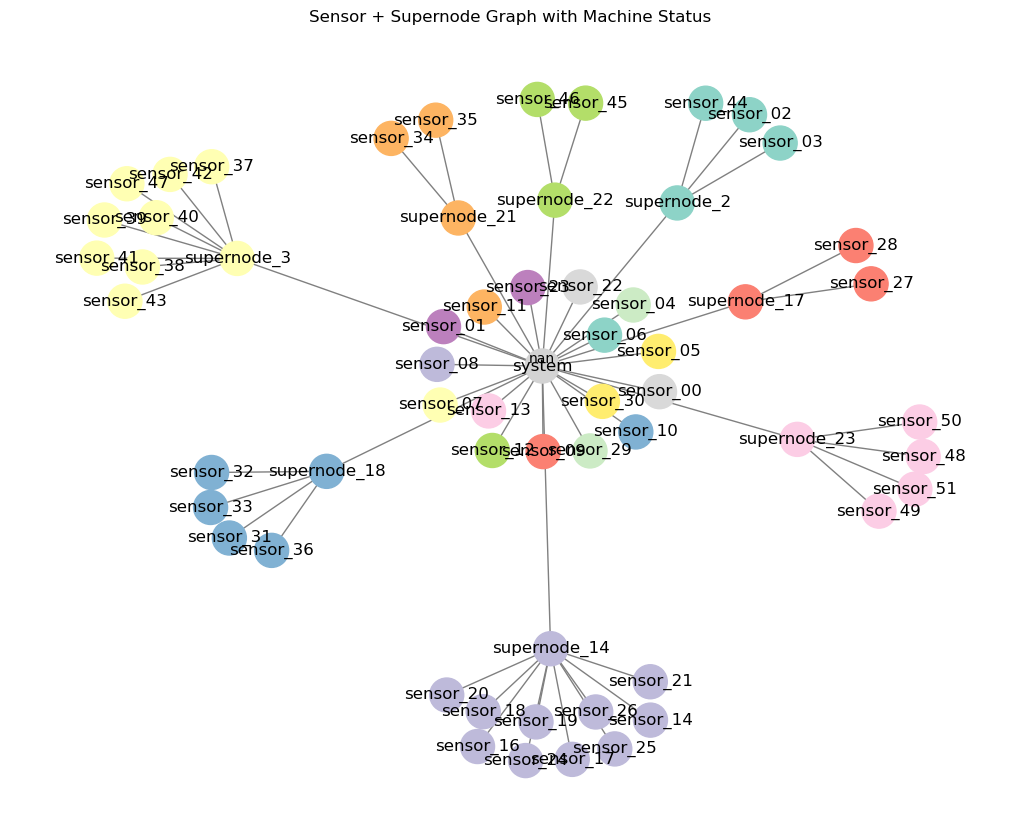

System Node:
{'value': np.float32(nan), 'value_zscore_span10000': np.float32(nan), 'value_exp_weighted_mean_span10000': np.float32(nan), 'value_exp_weighted_std_span10000': np.float32(nan), 'value_decimals': np.float32(nan), 'machine_status': np.float32(nan), 'node_type': 0}

supernode_17 Info:
{'value': np.float32(792.86896), 'value_zscore_span10000': np.float32(0.6660699), 'value_exp_weighted_mean_span10000': np.float32(762.22754), 'value_exp_weighted_std_span10000': np.float32(98.921005), 'value_decimals': np.float32(3.5), 'machine_status': np.float32(nan), 'node_type': 1}

Sensors connected to supernode_17:
sensor_27: {'value': np.float32(528.5009), 'value_zscore_span10000': np.float32(1.1184183), 'value_exp_weighted_mean_span10000': np.float32(505.0127), 'value_exp_weighted_std_span10000': np.float32(21.001257), 'value_decimals': np.float32(4.0), 'machine_status': np.float32(nan), 'node_type': 2}
sensor_28: {'value': np.float32(1057.237), 'value_zscore_span10000': np.float32(0.213

In [74]:
import networkx as nx
from torch_geometric.utils import to_networkx
import numpy as np

data = test_graphs[2]

# ---------------------
# 0. Prepare sensor index map for correlation lookup
# ---------------------
# sensor_idx_map = {sensor: i for i, sensor in enumerate(all_sensors)}
sensor_nodes = [n for n, t in zip(data.node_name, data.node_type) if t == 2]
sensor_idx_map = {sensor: i for i, sensor in enumerate(sensor_nodes)}


# ---------------------
# 1. Convert to NetworkX
# ---------------------
G = to_networkx(data, to_undirected=True)

# Map integer nodes to names
mapping = {i: name for i, name in enumerate(data.node_name)}
G = nx.relabel_nodes(G, mapping)

# ---------------------
# 2. Assign clusters
# ---------------------
cluster_map = {}
cluster_id = 0

for node in G.nodes():
    if node.startswith("supernode_"):
        cluster_map[node] = cluster_id
        for neighbor in G.neighbors(node):
            if neighbor != "system":
                cluster_map[neighbor] = cluster_id
        cluster_id += 1

# system node
cluster_map["system"] = -1

# assign remaining singletons
for node in G.nodes():
    if node not in cluster_map:
        cluster_map[node] = cluster_id
        cluster_id += 1

print("Final cluster mapping:", cluster_map)

# ---------------------
# 3. Add features from PyG data
# ---------------------
for i, name in enumerate(data.node_name):
    ntype = data.node_type[i].item()
    feat_values = data.x[i].numpy()  # node features as numpy array
    
    # assign normal features
    for j, suffix in enumerate(feature_suffixes):
        G.nodes[name][suffix.strip('_')] = feat_values[j]
    
    # assign extra feature (e.g., machine status) if it exists
    if len(feat_values) > len(feature_suffixes):
        G.nodes[name]['machine_status'] = feat_values[-1]
    
    G.nodes[name]['node_type'] = ntype



# ---------------------
# 3b. Add edge weights based on correlation
# ---------------------
for u, v in G.edges():
    # system or supernode edges → keep weight = 1.0
    if u == "system" or v == "system" or u.startswith("supernode_") or v.startswith("supernode_"):
        G.edges[u, v]['weight'] = 1.0
    else:
        # both are sensor nodes, lookup correlation
        i, j = sensor_idx_map[u], sensor_idx_map[v]
        corr_val = corr_matrix[i, j] if not np.isnan(corr_matrix[i, j]) else 0.0
        G.edges[u, v]['weight'] = float(corr_val)

# ---------------------
# 4. Pick row for visualization
# ---------------------
node_features = {name: feat for name, feat in zip(data.node_name, data.x.numpy())}


# 5. Extract system node status from PyG data
machine_status_val = data.x[0, 0].item()  # first feature of system node
print(f'machine state= {machine_status_val}')

# 6. Visualize
visualize_sensor_graph(G, cluster_map, machine_status_val=machine_status_val)


In [57]:
# # find index for a given node name
# target_name = "sensor_27"  # example
# node_idx = data.node_name.index(target_name)

# node_features = data.x[node_idx].numpy()
# node_type = data.node_type[node_idx].item()

# print("Node name:", target_name)
# print("Node type:", node_type)
# print("Features:", node_features)


In [ ]:
# data.cycle_id

In [ ]:
# print(G.nodes["system"])

In [ ]:
# print(G.nodes["supernode_21"])

In [ ]:
# print(G.edges["system","supernode_22"])

In [ ]:
# print(G.edges["sensor_31","sensor_28"])

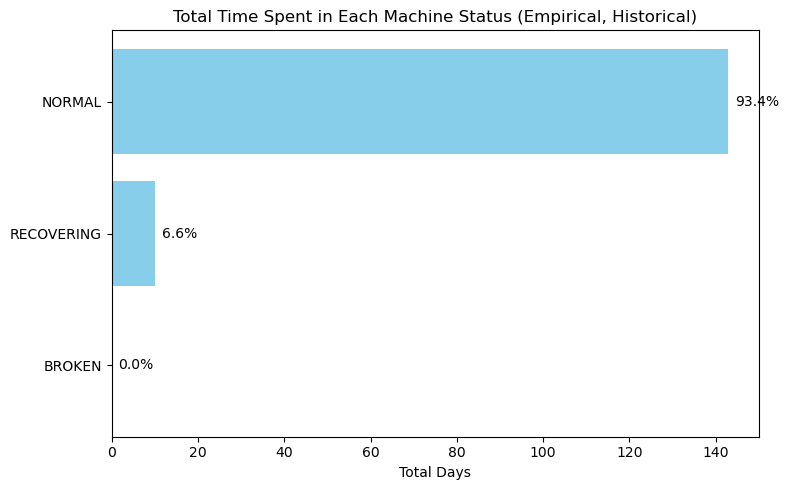

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cycle stats
cycle_stats = pd.read_pickle('cycle_stats.pkl')

# Group by status and sum durations
status_durations = cycle_stats.groupby('status')['count'].sum().sort_values()

# Convert minutes to days
status_durations_days = status_durations / (60 * 24)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(status_durations_days.index, status_durations_days, color='skyblue')
plt.title('Total Time Spent in Each Machine Status (Empirical, Historical)')
plt.xlabel('Total Days')

# Add percentages on bars
total_days = status_durations_days.sum()
for bar in bars:
    width = bar.get_width()
    plt.text(width + total_days*0.01, bar.get_y() + bar.get_height()/2,
             f'{width/total_days:.1%}', va='center')

plt.tight_layout()
plt.show()


In [83]:
import numpy as np

# Sort cycles
df = cycle_stats.sort_values('CycleID').reset_index(drop=True)

# Self transitions: same state repeats
self_df = df.copy()
self_df['next_status'] = self_df['status']
self_df['count'] = self_df['count'] - 1
self_df = self_df[self_df['count'] > 0]

# Next state transitions: different states
next_df = df.copy()
next_df['next_status'] = next_df['status'].shift(-1)
next_df['count'] = 1
next_df = next_df.dropna(subset=['next_status'])

# Combine both
transitions = pd.concat([self_df[['status','next_status','count']], next_df[['status','next_status','count']]])

# Get all unique states from status and next_status
states = sorted(set(transitions['status']).union(set(transitions['next_status'])))

# Group and sum counts
transition_matrix = transitions.groupby(['status','next_status'])['count'].sum().unstack(fill_value=0)

# Reindex rows and columns for consistent ordering
transition_matrix = transition_matrix.reindex(index=states, columns=states, fill_value=0)

print(transition_matrix)

# Convert counts to probabilities (rows sum to 1)
row_sums = transition_matrix.sum(axis=1).replace(0, 1)
transition_matrix = transition_matrix.div(row_sums, axis=0)

print()
print("Transition matrix (probabilities):")
print(transition_matrix)

# Calculate steady state vector
# solve steady state: pi such that pi = pi * P, 
eigvals, eigvecs = np.linalg.eig(transition_matrix.T)

# Get eigenvector corresponding to eigenvalue 1
steady_vec = eigvecs[:, np.isclose(eigvals, 1)]

# Normalize steady state
steady_state = steady_vec[:, 0].real
steady_state /= steady_state.sum()
print()
print(f"Steady state %: [{', '.join(f'{x:.3f}' for x in steady_state * 100)}]")


next_status  BROKEN  NORMAL  RECOVERING
status                                 
BROKEN            0       0           7
NORMAL            7  205828           0
RECOVERING        0       7       14470

Transition matrix (probabilities):
next_status    BROKEN    NORMAL  RECOVERING
status                                     
BROKEN       0.000000  0.000000    1.000000
NORMAL       0.000034  0.999966    0.000000
RECOVERING   0.000000  0.000484    0.999516

Steady state %: [0.003, 93.426, 6.571]


### Observations

- 7 cycles of Normal to Broken
- 7 cycles of Recovering to Normal
- Long-term, the water pump is expected to operate in NORMAL machine status ~93% of the time, and 7% of the time it is in RECOVERING status.
    - 93% availability is **great** for typical manufacturing, but for a small village relying on a ***single*** pump, it can have serious consequences.
    - Traditionally, adding a second village water pump mitigates downtime risk when the primary fails; in a critical supply setting, where significant downtime can cost lives, relying on just one machine is not only risky, it’s a fundamental systemic design flaw.
    - If adding a backup is infeasible, then implementing predictive maintenance becomes critical to ensure a reliable water supply.